<a href="https://colab.research.google.com/github/aditya26droid/Sentiment_Analysis_Webscrapping/blob/main/News_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import nltk
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
from wordcloud import WordCloud
import os
import spacy
nlp = spacy.load('en_core_web_sm')
from textblob import TextBlob


In [ ]:
!pip install pattern

In [10]:
from pattern.en import sentiment

In [2]:
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
req=requests.get('https://www.newsy.com/stories/commercial-companies-advance-space-exploration/')
req.encoding = 'utf-8'

In [4]:
html = req.text

In [5]:
html

'<!DOCTYPE html><html lang="en"><head><!-- Google Analytics: GA4 --><script>var gtCode = \'G-D7R21VYTPB\'; // live\n                    var gtScriptElement = document.createElement(\'script\')\n                    gtScriptElement.src = `https://www.googletagmanager.com/gtag/js?id=${gtCode}&l=GA4DataLayer`;\n                    gtScriptElement.onload = OnceLoaded;\n                    document.getElementsByTagName(\'head\')[0].appendChild(gtScriptElement);\n                    function OnceLoaded() {\n                        window.GA4DataLayer = window.GA4DataLayer || [];\n                        function gtag4(){GA4DataLayer.push(arguments);}\n                        gtag4(\'js\', new Date());\n\n                        gtag4(\'config\', gtCode);\n                    }\n                    </script><!-- End Google Analytics: GA4 --><!-- Google Analytics --><script>\n                    (function(i,s,o,g,r,a,m){i[\'GoogleAnalyticsObject\']=r;i[r]=i[r]||function(){\n                    

In [6]:
soup = BeautifulSoup(html)
text = soup.get_text()

In [7]:
len(text)

4986

In [8]:
print(text[100:1100])

ePoliticsBusinessScience/HealthWorldTechEntertainmentSportsShowsScheduleShow ListDocumentariesIn Real LifeNext LevelBellingcatAll DocsInvestigationsAboutTeamViewer SpotlightHotlineSupportWhere to WatchSearchFollow Us






SpaceHow Commercial Companies Are Advancing Space ExplorationThere's competition among roughly a dozen private companies to launch new space stations.How Commercial Companies Are Advancing Space ExplorationNASAClayton SandellBy Clayton SandellFacebook ShareTweetEmailSMSPosted:  8:00 p.m. EDT Oct 29, 2021As astronauts blast off to the International Space Station this weekend on a SpaceX rocket, the company is also showing off a massive ship it says will one day take travelers far, far away.Newly released video shows the 'Starship' lifting into an aerial ballet of flips and turns before landing again. SpaceX hopes the ship will reach orbit for the first time next month and maybe, one day, make founder Elon Musk's mission-to-Mars dreams a reality."He says, 'I want to di

In [9]:
clean_text= text.replace("\n", " ")
clean_text= clean_text.replace("/", " ")
clean_text= ''.join([c for c in clean_text if c != "'"])

In [10]:
clean_text=" ".join(clean_text.split())
clean_text

'Commercial Companies Advance Space Exploration Scripps Newswatch livetoggle menuNewsU.S. NewsLifePoliticsBusinessScience HealthWorldTechEntertainmentSportsShowsScheduleShow ListDocumentariesIn Real LifeNext LevelBellingcatAll DocsInvestigationsAboutTeamViewer SpotlightHotlineSupportWhere to WatchSearchFollow Us SpaceHow Commercial Companies Are Advancing Space ExplorationTheres competition among roughly a dozen private companies to launch new space stations.How Commercial Companies Are Advancing Space ExplorationNASAClayton SandellBy Clayton SandellFacebook ShareTweetEmailSMSPosted: 8:00 p.m. EDT Oct 29, 2021As astronauts blast off to the International Space Station this weekend on a SpaceX rocket, the company is also showing off a massive ship it says will one day take travelers far, far away.Newly released video shows the Starship lifting into an aerial ballet of flips and turns before landing again. SpaceX hopes the ship will reach orbit for the first time next month and maybe, one

In [11]:
sentence=[]
tokens = nlp(clean_text)
for sent in tokens.sents:
    sentence.append((sent.text.strip()))

In [12]:
sentence

['Commercial Companies Advance Space Exploration Scripps Newswatch livetoggle menuNewsU.S. NewsLifePoliticsBusinessScience HealthWorldTechEntertainmentSportsShowsScheduleShow ListDocumentariesIn Real LifeNext LevelBellingcatAll DocsInvestigationsAboutTeamViewer SpotlightHotlineSupportWhere to WatchSearchFollow Us SpaceHow Commercial Companies Are Advancing Space ExplorationTheres competition among roughly a dozen private companies to launch new space stations.',
 'How Commercial Companies Are Advancing Space ExplorationNASAClayton SandellBy Clayton SandellFacebook ShareTweetEmailSMSPosted: 8:00 p.m. EDT',
 'Oct 29, 2021As astronauts blast off to the International Space Station this weekend on a SpaceX rocket, the company is also showing off a massive ship it says will one day take travelers far, far away.',
 'Newly released video shows the Starship lifting into an aerial ballet of flips and turns before landing again.',
 'SpaceX hopes the ship will reach orbit for the first time next m

In [13]:
print(len(sentence))

32


In [14]:
textblob_sentiment=[]
for s in sentence:
    txt= TextBlob(s)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    textblob_sentiment.append([s,a,b])

In [15]:
df_textblob = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])

In [16]:
df_textblob.head()

,Sentence,Polarity,Subjectivity
0,Commercial Companies Advance Space Exploration...,0.039394,0.254924
1,How Commercial Companies Are Advancing Space E...,0.000000,0.000000
2,"Oct 29, 2021As astronauts blast off to the Int...",0.050000,0.750000
3,Newly released video shows the Starship liftin...,0.136364,0.454545
4,SpaceX hopes the ship will reach orbit for the...,0.125000,0.166667


In [17]:
df_textblob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sentence      32 non-null     object 
 1   Polarity      32 non-null     float64
 2   Subjectivity  32 non-null     float64
dtypes: float64(2), object(1)
memory usage: 896.0+ bytes


Text(0.5, 9.444444444444438, 'Sentence Polarity (Textblob)')

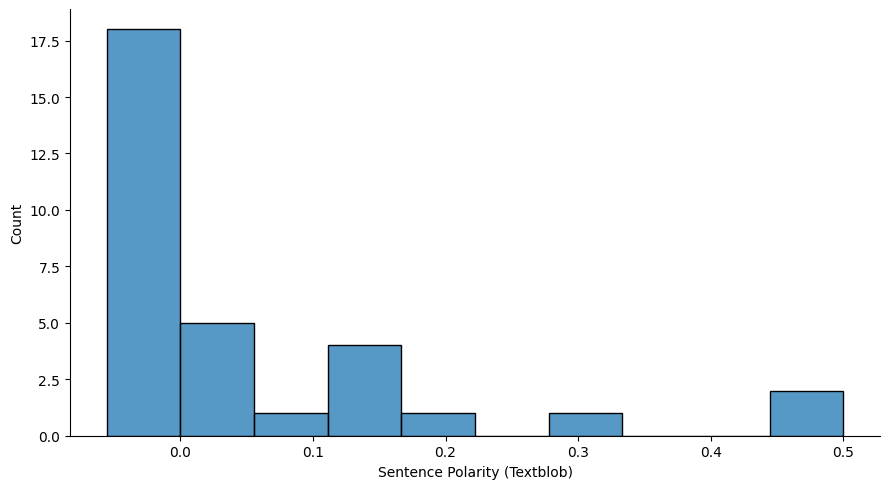

In [18]:
sns.displot(df_textblob["Polarity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity (Textblob)")


Text(0.5, 9.444444444444438, 'Sentence Subjectivity (Textblob)')

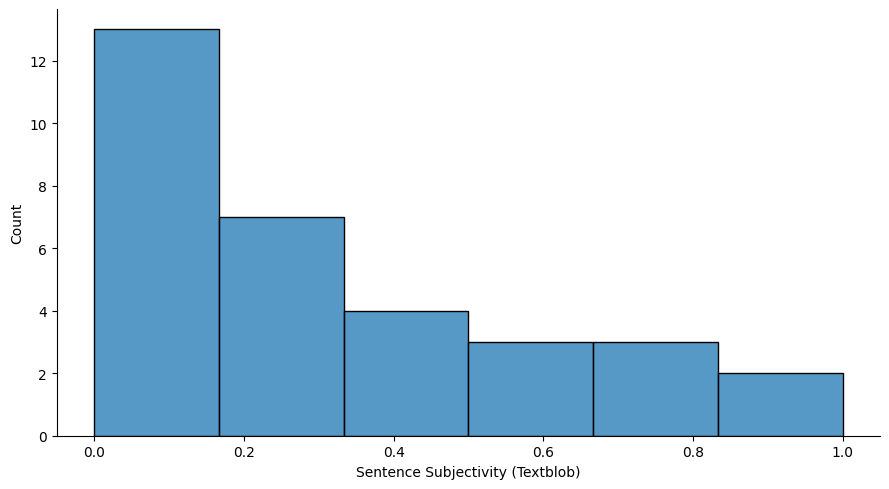

In [19]:
sns.displot(df_textblob["Subjectivity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Subjectivity (Textblob)")

In [20]:
clean_text

'Commercial Companies Advance Space Exploration Scripps Newswatch livetoggle menuNewsU.S. NewsLifePoliticsBusinessScience HealthWorldTechEntertainmentSportsShowsScheduleShow ListDocumentariesIn Real LifeNext LevelBellingcatAll DocsInvestigationsAboutTeamViewer SpotlightHotlineSupportWhere to WatchSearchFollow Us SpaceHow Commercial Companies Are Advancing Space ExplorationTheres competition among roughly a dozen private companies to launch new space stations.How Commercial Companies Are Advancing Space ExplorationNASAClayton SandellBy Clayton SandellFacebook ShareTweetEmailSMSPosted: 8:00 p.m. EDT Oct 29, 2021As astronauts blast off to the International Space Station this weekend on a SpaceX rocket, the company is also showing off a massive ship it says will one day take travelers far, far away.Newly released video shows the Starship lifting into an aerial ballet of flips and turns before landing again. SpaceX hopes the ship will reach orbit for the first time next month and maybe, one

In [21]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+|\$[\d\.]+|\S+')

In [22]:
tokens = tokenizer.tokenize(clean_text)
len(tokens)

849

In [23]:
print(tokens)

['Commercial', 'Companies', 'Advance', 'Space', 'Exploration', 'Scripps', 'Newswatch', 'livetoggle', 'menuNewsU', '.S.', 'NewsLifePoliticsBusinessScience', 'HealthWorldTechEntertainmentSportsShowsScheduleShow', 'ListDocumentariesIn', 'Real', 'LifeNext', 'LevelBellingcatAll', 'DocsInvestigationsAboutTeamViewer', 'SpotlightHotlineSupportWhere', 'to', 'WatchSearchFollow', 'Us', 'SpaceHow', 'Commercial', 'Companies', 'Are', 'Advancing', 'Space', 'ExplorationTheres', 'competition', 'among', 'roughly', 'a', 'dozen', 'private', 'companies', 'to', 'launch', 'new', 'space', 'stations', '.How', 'Commercial', 'Companies', 'Are', 'Advancing', 'Space', 'ExplorationNASAClayton', 'SandellBy', 'Clayton', 'SandellFacebook', 'ShareTweetEmailSMSPosted', ':', '8', ':00', 'p', '.m.', 'EDT', 'Oct', '29', ',', '2021As', 'astronauts', 'blast', 'off', 'to', 'the', 'International', 'Space', 'Station', 'this', 'weekend', 'on', 'a', 'SpaceX', 'rocket', ',', 'the', 'company', 'is', 'also', 'showing', 'off', 'a', '

In [24]:
words = []
for word in tokens:
    words.append(word.lower())

In [25]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [26]:
stopwords[0:5]

['i', 'me', 'my', 'myself', 'we']

In [27]:
words_new=[]
for word in words:
    if word not in stopwords:
        words_new.append(word)

In [28]:
len(words_new)

567

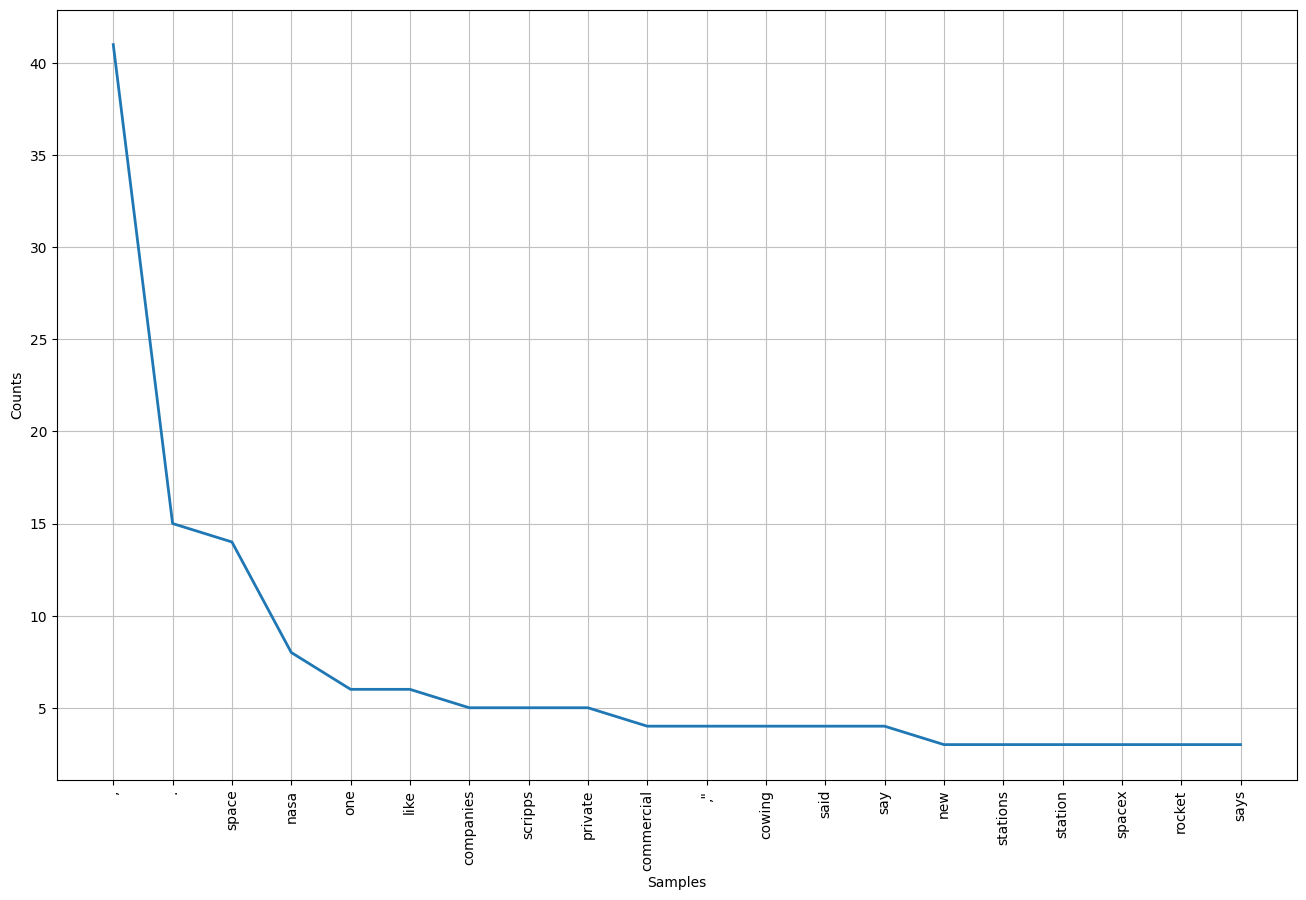

<Axes: xlabel='Samples', ylabel='Counts'>

In [29]:
freq_dist = nltk.FreqDist(words_new)
plt.subplots(figsize=(16,10))
freq_dist.plot(20)

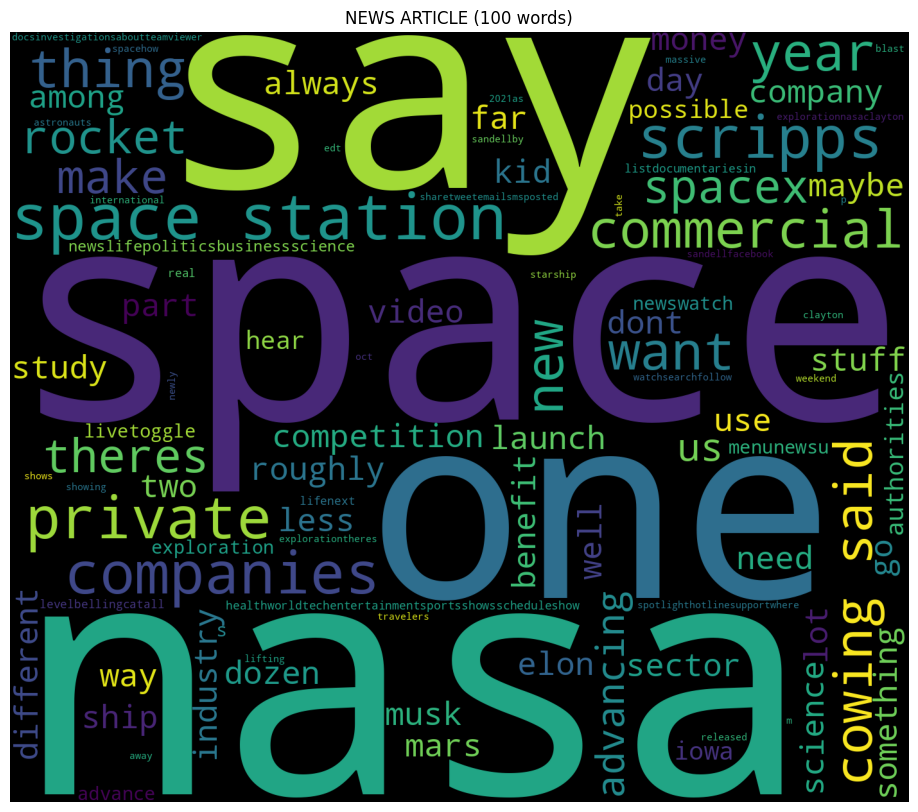

In [30]:
res=' '.join([i for i in words_new if not i.isdigit()])
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res)
plt.imshow(wordcloud)
plt.title('NEWS ARTICLE (100 words)')
plt.axis('off')
plt.show()